
<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Víctor Navarro Aránguiz</em><br>

</div>

# Python para Data Science: Proyecto Final

**Fecha de Entrega**: 06 de Agosto de 2024

**Objetivos:**
  - Aplicar los conceptos aprendidos en clases.
  - Realizar el análisis de un dataset de su preferencia.
  - Familiarizarse con el manejo de versiones a través de Git

**Puntaje Total:** 24 Puntos

**Nombre Estudiante(s)**: `Jeanette León Vejar`

**Link Github**: [GitHub Proyecto Final](https://github.com/JeanetteLeon/Python_Proyecto_Final)

## Creación de nuevas variables a partir de las existentes

Como se mencionó en el apartado anterior se tomará como medida de tratamiento de outliers alternativo, la creación de nuevas variables para quitar el ruido del dataset.

### Definición de nuevas variables 

- `Largometraje` (boolean): Categoriza si la película es un largometraje (es superior a 200 minutos).
- `Categ_metascore` (boolean): Categoriza si la película tuvo evaluación por los grandes críticos de la industria.
- `Popularidad` (string): Categoriza la popularidad medida por la cantidad de votos: Baja (0-100k votos), Media (100k a 200k votos) y Alta (>200k votos).
- `tipo_ganancia` (string): Categoriza las ganancias brutas recaudadas por la película: Baja (0-20M), Media (20M a 100M votos) y Alta (>100M).
- `Remake` (boolean): Categoriza, si la película tiene una adaptación con el mismo nombre en el dataset. 
- `Rating_general` (float): escala de 0 a 10 de la opinión general del público (`Rating`) y críticos(`Metascore`), donde si el valor absoluto se acerca a cero, es porque las opiniones de ambos grupos son parecidas. Para esto se parametrizaría el campo `Metascore` dividiéndolo por 10 y así tendrían variables la misma escala de 0 a 10 y luego se restarían ambas variables en valor absoluto.


### Utilidad y ejemplos de las nuevas variables 

- `Largometraje` (boolean): La variable `Runtime` tenía outliers que superan significativamente su promedio de 110 minutos (hay películas más 7 horas) y para disminuir ese ruido y quitar los outliers, se creó esta variable. Un ejemplo de utilidad es filtrar las películas que no sea largometrajes, así consideramos sólo las películas sin outliers.

- `Categ_metascore` (boolean): En la variable `Metascore` para el tratamiento de nulos, estos fueron reemplazados por ceros, esto creó outlier (que más 2 mil valores fueran cero) y para separar las distribuciones se creó esta variable (como se muestra en el gráfico). Un ejemplo de utilidad es filtrar por películas si tuvieron valoración por críticos de la industria, así consideramos sólo las películas sin outliers.

- `Popularidad` (string): En la variable 'Votes', había valores de votes muy extremos (el rango de valores por película es de 10 mil a 27 millones votos), y para ordenar la distribución se creó esta variable, generaron categorías o rangos de números de votos: Baja (0-100k votos), Media (100k a 200k votos) y Alta (>200k votos). Un ejemplo es medir la cantidad de películas que tuvieron en cada categoría y revisar sus características.

- `tipo_ganancia` (string): Lo mismo que ocurre con los votos pasa con las ganancias brutas, donde tiene valores que van desde los 7 a 900 millones dólares, así creó esta variable para ordenar en grupos las ganancias: Baja (0-20M), Media (20M a 100M votos) y Alta (>100M).  Un ejemplo es medir la cantidad de películas que tuvieron en cada categoría de ganancias y revisar sus características.

- `Remake` (boolean): Cuando se hizo la revisión de duplicados, se constató de la existencia de películas con el mismo nombre, pero con distintos actores y directores, a estos casos se les consideró remakes. Se creó la variable con mismo nombre para detectar casos. Un ejemplo, es las películas que tuvieron remakes están dentro este top, tuvieron buenas ganancias y valoración, se podrías probar esta hipótesis.

- `Rating_general` (float): Esta variable ayuda a reconocer a las películas que tuvieron igual valoración tanto por críticos del cine (Metascore) y por el público en general (Rating). Un ejemplo de utilidad es filtrar por valores cercanos a cero (0 a 3) y ver la cantidad de películas y se revisar las otras caracterizas como la valoración y las ganancias.



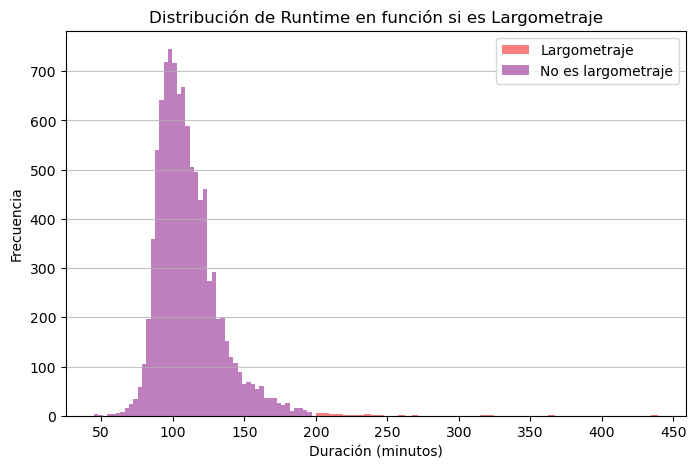      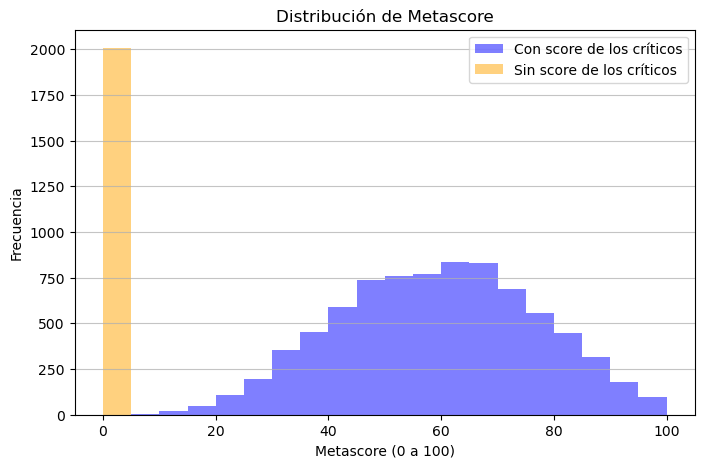


In [137]:
# Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [122]:
# Importar el dataset con tratamiento de datos
dataset = pd.read_csv('../data/Top_10000_Movies_IMDb_con_tratamiento_de_datos.csv')
dataset

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,1,The Shawshank Redemption,9.3,142,Drama,82,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,9.2,175,"Crime, Drama",100,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/
2,3,Ramayana: The Legend of Prince Rama,9.2,135,"Animation, Action, Adventure",0,An anime adaptation of the Hindu epic the Rama...,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108,https://www.imdb.com/title/tt0259534/
3,4,The Chaos Class,9.2,87,"Comedy, Drama",0,"Lazy, uneducated students share a very close b...","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785,https://www.imdb.com/title/tt0252487/
4,5,Daman,9.1,121,"Adventure, Drama",0,"The film is set in 2015. Sid, is a young docto...","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303,https://www.imdb.com/title/tt17592606/
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,Yogi Bear,4.6,80,"Animation, Adventure, Comedy",35,A documentary filmmaker travels to Jellystone ...,"['Eric Brevig', 'Dan Aykroyd', 'Justin Timberl...","['Dan Aykroyd', 'Justin Timberlake', 'Anna Far...",22762,100246011,https://www.imdb.com/title/tt1302067/
9995,9996,Troll,4.6,82,"Comedy, Fantasy, Horror",30,A wicked troll king in search of a mystical ri...,"['John Carl Buechler', 'Michael Moriarty', 'Sh...","['Michael Moriarty', 'Shelley Hack', 'Noah Hat...",10948,5450815,https://www.imdb.com/title/tt0092115/
9996,9997,Paranormal Activity 4,4.6,88,"Horror, Mystery",40,It has been five years since the disappearance...,"['Henry Joost', 'Ariel Schulman', 'Stephen Dun...","['Ariel Schulman', 'Stephen Dunham', 'Katie Fe...",68430,53921300,https://www.imdb.com/title/tt2109184/
9997,9998,Dark Crimes,4.6,92,"Crime, Drama, Mystery",24,A murder investigation of a slain businessman ...,"['Alexandros Avranas', 'Jim Carrey', 'Marton C...","['Jim Carrey', 'Marton Csokas', 'Charlotte Gai...",19098,19098,https://www.imdb.com/title/tt1901024/


In [141]:

def crear_variables(dataset):
    
    '''Función que crea nuevas variables apartir de las existentes '''
    
    df = dataset
    # Creación de la variable "Largometraje"
    df['Largometraje'] = np.where(df['Runtime'] >= 200, True, False)
    
    # Creación de la variable "Categ_metascore"
    df['Categ_metascore'] = np.where(df['Metascore'] != 0, True, False)
    
    # Creación de la variable "Popularidad"
    df['Popularidad'] = df['Votes'].apply(
    lambda x: 'Alto' if x > 100000 else ('Medio' if x >= 20000 else 'Bajo'))
    
    # Creación de la variable "Categ_ganancia"
    df['Tipo_ganancia'] = df['Gross'].apply(
    lambda x: 'Alto' if x > 100000000 else ('Medio' if x >= 20000000 else 'Bajo'))
    
    # Contador de cuantas veces se repiten el nombre de una pelicula
    df['Contador_movie_name'] = df['Movie Name'].map(df['Movie Name'].value_counts())
    
    # Creación de la variable "Remake"
    df['Remake'] = np.where(df['Contador_movie_name'] > 1, True, False) 
    
    # Creación de la variable "Rating_general"
    df['Rating_general'] = ((df['Metascore'] / 10) - df['Rating']).abs()
    
    # Eliminar la variable auxiliar " Contador_movie_name"
    df = df.drop(columns=['Contador_movie_name'])
    
    
    return df

dataset_con_nuevas_variables = crear_variables(dataset)


# Exportar a csv despues de cambios en tratamientos de datos
# dataset_con_nuevas_variables.to_csv('../data/Top_10000_Movies_IMDb_con_nuevas_variables.csv', index=False) 

dataset_con_nuevas_variables
    

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link,Largometraje,Categ_metascore,Popularidad,Tipo_ganancia,Remake,Rating_general
0,1,The Shawshank Redemption,9.3,142,Drama,82,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/,False,True,Alto,Medio,False,1.1
1,2,The Godfather,9.2,175,"Crime, Drama",100,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/,False,True,Alto,Alto,False,0.8
2,3,Ramayana: The Legend of Prince Rama,9.2,135,"Animation, Action, Adventure",0,An anime adaptation of the Hindu epic the Rama...,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108,https://www.imdb.com/title/tt0259534/,False,False,Bajo,Bajo,False,9.2
3,4,The Chaos Class,9.2,87,"Comedy, Drama",0,"Lazy, uneducated students share a very close b...","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785,https://www.imdb.com/title/tt0252487/,False,False,Medio,Bajo,False,9.2
4,5,Daman,9.1,121,"Adventure, Drama",0,"The film is set in 2015. Sid, is a young docto...","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303,https://www.imdb.com/title/tt17592606/,False,False,Bajo,Bajo,False,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,Yogi Bear,4.6,80,"Animation, Adventure, Comedy",35,A documentary filmmaker travels to Jellystone ...,"['Eric Brevig', 'Dan Aykroyd', 'Justin Timberl...","['Dan Aykroyd', 'Justin Timberlake', 'Anna Far...",22762,100246011,https://www.imdb.com/title/tt1302067/,False,True,Medio,Alto,False,1.1
9995,9996,Troll,4.6,82,"Comedy, Fantasy, Horror",30,A wicked troll king in search of a mystical ri...,"['John Carl Buechler', 'Michael Moriarty', 'Sh...","['Michael Moriarty', 'Shelley Hack', 'Noah Hat...",10948,5450815,https://www.imdb.com/title/tt0092115/,False,True,Bajo,Bajo,True,1.6
9996,9997,Paranormal Activity 4,4.6,88,"Horror, Mystery",40,It has been five years since the disappearance...,"['Henry Joost', 'Ariel Schulman', 'Stephen Dun...","['Ariel Schulman', 'Stephen Dunham', 'Katie Fe...",68430,53921300,https://www.imdb.com/title/tt2109184/,False,True,Medio,Medio,False,0.6
9997,9998,Dark Crimes,4.6,92,"Crime, Drama, Mystery",24,A murder investigation of a slain businessman ...,"['Alexandros Avranas', 'Jim Carrey', 'Marton C...","['Jim Carrey', 'Marton Csokas', 'Charlotte Gai...",19098,19098,https://www.imdb.com/title/tt1901024/,False,True,Bajo,Bajo,False,2.2


In [124]:
# Revisar el tipo de datos de la nuevas variables
dataset_con_nuevas_variables.dtypes

ID                   int64
Movie Name          object
Rating             float64
Runtime              int64
Genre               object
Metascore            int64
Plot                object
Directors           object
Stars               object
Votes                int64
Gross                int64
Link                object
Largometraje          bool
Categ_metascore       bool
Popularidad         object
Tipo_ganancia       object
Remake                bool
Rating_general     float64
dtype: object

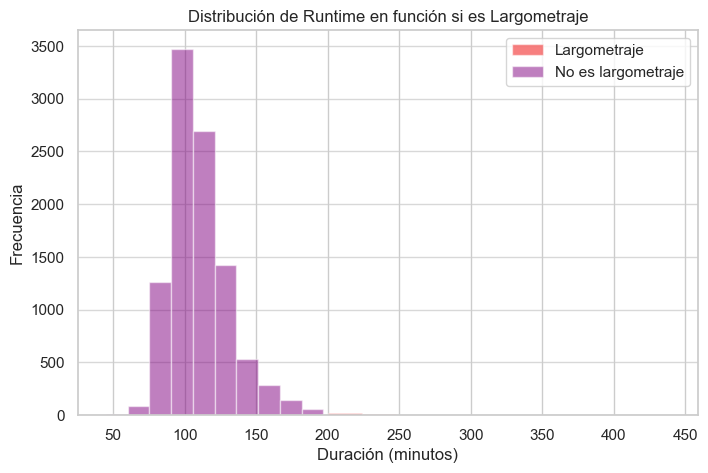

In [125]:
# Configurar el gráfico
plt.figure(figsize=(8, 5))

# Crear histogramas
plt.hist(dataset_con_nuevas_variables[dataset_con_nuevas_variables['Largometraje'] == True]['Runtime'], bins=10, alpha=0.5, label='Largometraje', color='#f00000')
plt.hist(dataset_con_nuevas_variables[dataset_con_nuevas_variables['Largometraje'] == False]['Runtime'], bins=10, alpha=0.5, label='No es largometraje', color='purple')

# Personalizar el gráfico
plt.title('Distribución de Runtime en función si es Largometraje')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()


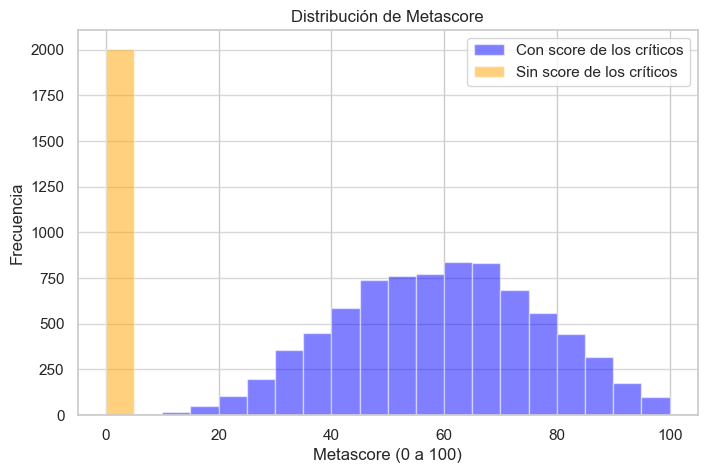

In [126]:
# Configurar el gráfico
plt.figure(figsize=(8, 5))

# Crear histogramas
plt.hist(dataset_con_nuevas_variables[dataset_con_nuevas_variables['Categ_metascore'] == True]['Metascore'], 
         bins=20, alpha=0.5, label='Con score de los críticos', 
         color='blue', range=(0, 100))

plt.hist(dataset_con_nuevas_variables[dataset_con_nuevas_variables['Categ_metascore'] == False]['Metascore'], 
         bins=20, alpha=0.5, label='Sin score de los críticos', 
         color='orange', range=(0, 100))

# Personalizar el gráfico
plt.title('Distribución de Metascore')
plt.xlabel('Metascore (0 a 100)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()
